### OUTLIERS

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import psycopg2

In [13]:
us_education = pd.read_sql_query('select * from useducation', con = engine)
us_education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


Before answering the main questions addressing the missing values will give our answers more analytical efficiency;

In [30]:
us_education[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].isnull().sum() * 100/ us_education[['TOTAL_REVENUE'
                                                                                ,'TOTAL_EXPENDITURE']].isnull().count()

TOTAL_REVENUE        14.209115
TOTAL_EXPENDITURE    14.209115
dtype: float64

first thing first we have to deal with the missing values,and my preference is intrapolation because it is a time series data.

In [34]:
completed_us_education = us_education[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].interpolate()

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

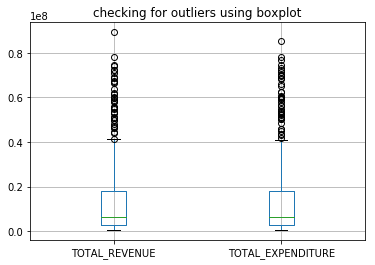

In [37]:
completed_us_education.boxplot();
plt.title('checking for outliers using boxplot');

from the boxplot on the above we can see that we do have outliers

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

lets get ride of the outliers from our two variables using the tukey outlier detection method.lets use threshold at 1.5 and find the number of outliers and then alter them after identifying their effect on our overall analysis process.

The first and Third quartile of TOTAL_REVENUE variable are: (2546260.75, 18036496.0)
The total number of outliers for the TOTAL_REVENUE variable is: 40
The list of the outlier values in the TOTAL_REVENUE variable are: 
 (array([ 367,  420,  472,  481,  524,  576,  628,  680,  708,  731,  760,
        784,  813,  824,  836,  865,  876,  891,  921,  932,  944,  973,
        984,  997, 1025, 1036, 1048, 1077, 1088, 1101, 1129, 1140, 1152,
       1180, 1191, 1203, 1231, 1242, 1254, 1282]),)

 ....................................................
The first and Third quartile of TOTAL_EXPENDITURE variable are: (2523968.5, 18017039.75)
The total number of outliers for the TOTAL_EXPENDITURE variable is: 42
The list of the outlier values in the TOTAL_EXPENDITURE variable are: 
 (array([ 420,  472,  481,  524,  576,  605,  628,  656,  680,  708,  731,
        760,  771,  784,  813,  824,  836,  865,  876,  891,  921,  932,
        944,  973,  984,  997, 1025, 1036, 1048, 1077, 1088, 1101, 1129,
 

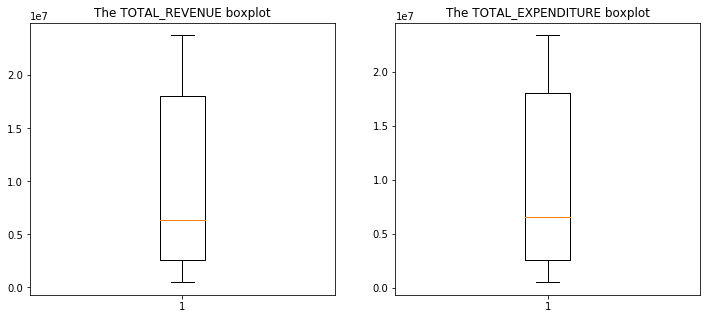

In [129]:
for column in completed_us_education.columns:
    q1, q3 = np.percentile(completed_us_education[column], [25, 75])
    print('The first and Third quartile of {} variable are: {}'.format(column, (q1, q3)))
    iqr = q3 - q1
    min_value = q1 - (1.5 * iqr)
    max_value = q3 - (1.5 * iqr)
    print('The total number of outliers for the {} variable is: {}'.format(column
                           ,len(np.where((completed_us_education[column] > max) 
                           | (completed_us_education[column] < min))[0])))
    print('The list of the outlier values in the {} variable are: \n {}'.format(column
                           ,np.where((completed_us_education[column] > max) 
                           | (completed_us_education[column] < min))))
    print('\n ....................................................')
plt.figure(figsize = (12, 5))    
for plot_no, column in zip([1,2], completed_us_education.columns):    
    winsorized_variable = winsorize(completed_us_education[column], (0,0.1))
    plt.subplot(1,2,plot_no)
    plt.boxplot(winsorized_variable);
    plt.title('The {} boxplot'.format(column))

Form the above boxplots i can validate that i have managed to eliminate the outliers.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.